In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [28]:
courses = pd.read_csv('../data/course_reqs.csv', header=0, encoding='unicode_escape')

In [29]:
print(courses)

      Course                               Prereqs   Coreqs
0    CSC 111                                   NaN      NaN
1    CSC 115                               CSC 111      NaN
2    CSC 225                     CSC 115, MATH 122      NaN
3    CSC 226                               CSC 225      NaN
4    CSC 230                               CSC 115      NaN
5    CSC 320                               CSC 226      NaN
6    CSC 355            CSC 230, ECE 255, MATH 122      NaN
7    CSC 360            SENG 265, CSC 230, ECE 255  CSC 226
8    CSC 361            SENG 265, CSC 230, ECE 255      NaN
9    CSC 370                     SENG 265, CSC 226      NaN
10   CSC 460             CSC 355, ECE 355, CSC 360      NaN
11   ECE 255                               CSC 111      NaN
12   ECE 260                    MATH 101, MATH 110      NaN
13   ECE 310                               ECE 260      NaN
14   ECE 355                     MATH 122, CSC 230      NaN
15   ECE 360                            

In [30]:
course_counts = {}

for index, row in courses.iterrows():
    prereqs = row['Prereqs']
    coreqs = row['Coreqs']
    
    courses_set = set()
    
    if pd.notnull(prereqs):
        courses_set.update(prereqs.split(', '))
    
    if pd.notnull(coreqs):
        courses_set.update(coreqs.split(', '))
    
    for course in courses_set:
        if course not in course_counts:
            course_counts[course] = 1
        else:
            course_counts[course] += 1

for index, row in courses.iterrows():
    course = row['Course']
    if course not in course_counts:
        course_counts[course] = 1  # Add 1 to course count by default
    else:
        course_counts[course] += 1  # Add 1 to existing course count

sorted_course_counts = sorted(course_counts.items(), key=lambda x: x[1], reverse=True)

for course, count in sorted_course_counts:
    print(f'{course}: {count}')

SENG 265: 8
CSC 230: 6
ECE 255: 5
CSC 115: 4
CSC 226: 4
CSC 355: 4
SENG 275: 4
CSC 111: 3
MATH 122: 3
ECE 355: 3
ECE 260: 3
CSC 361: 3
SENG 321: 3
CSC 225: 2
CSC 360: 2
ECE 458: 2
CSC 370: 2
SENG 350: 2
MATH 101: 1
MATH 110: 1
 SENG 321: 1
CSC 320: 1
CSC 460: 1
ECE 310: 1
ECE 360: 1
ECE 455: 1
SENG 310: 1
SENG 360: 1
SENG 371: 1
SENG 401: 1
SENG 426: 1
SENG 440: 1
SENG 499: 1


In [31]:
# Remove non seng, csc, or ece courses
valid_keys = ['SENG', 'ECE', 'CSC']
filtered_data = {key: value for key, value in course_counts.items() if any(valid_key in key for valid_key in valid_keys)}

print(filtered_data)

{'CSC 111': 3, 'CSC 115': 4, 'CSC 225': 2, 'CSC 226': 4, 'ECE 255': 5, 'CSC 230': 6, 'SENG 265': 8, 'CSC 360': 2, 'CSC 355': 4, 'ECE 355': 3, 'ECE 260': 3, 'SENG 275': 4, 'CSC 361': 3, 'ECE 458': 2, ' SENG 321': 1, 'SENG 321': 3, 'CSC 370': 2, 'SENG 350': 2, 'CSC 320': 1, 'CSC 460': 1, 'ECE 310': 1, 'ECE 360': 1, 'ECE 455': 1, 'SENG 310': 1, 'SENG 360': 1, 'SENG 371': 1, 'SENG 401': 1, 'SENG 426': 1, 'SENG 440': 1, 'SENG 499': 1}


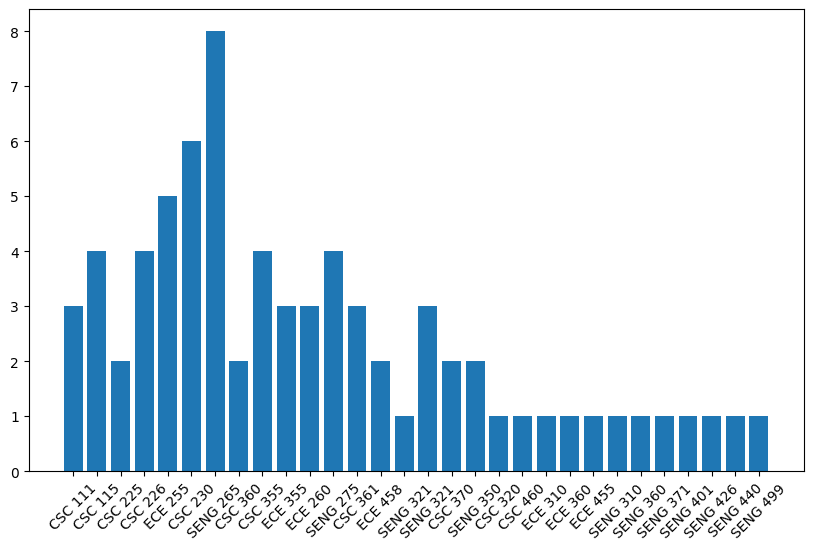

In [32]:
keys = list(filtered_data.keys())
values = list(filtered_data.values())

plt.bar(keys, values)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 6)

In [33]:
output_file = '../data/course_reqs_count.csv'

# Write the dictionary to CSV
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Course', 'Count'])
    
    # Write the data
    for course, count in filtered_data.items():
        writer.writerow([course, count])